In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline

Лабораторная работа №1. Подготовка и нормализация данных

Чтение датасета

In [2]:
df = pd.read_csv('all_perth_310121.csv', encoding='ISO-8859-1')
row_count = df.shape[0]
column_count = df.shape[1]

Вывод информации о датасете

In [3]:
print(f'The DataFrame has {row_count} rows.')
print(f'The DataFrame has {column_count} columns.')
df.head()

The DataFrame has 33656 rows.
The DataFrame has 19 columns.


,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


1. Предварительная обработка данных 

    a. Визуализация значимых признаков 

        Диаграммы рассеивания

<Axes: xlabel='PRICE', ylabel='BUILD_YEAR'>

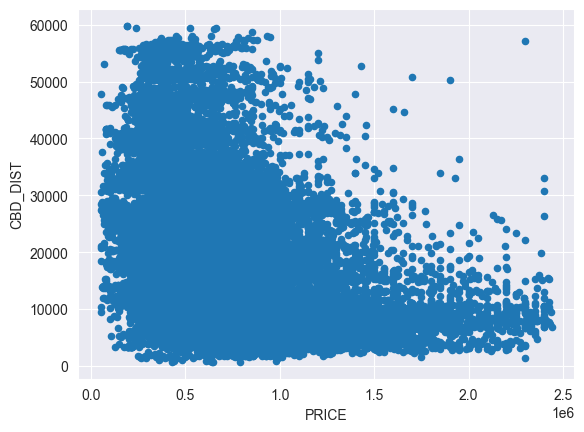

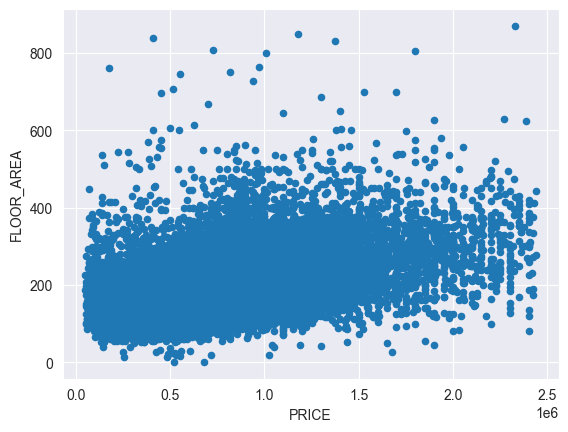

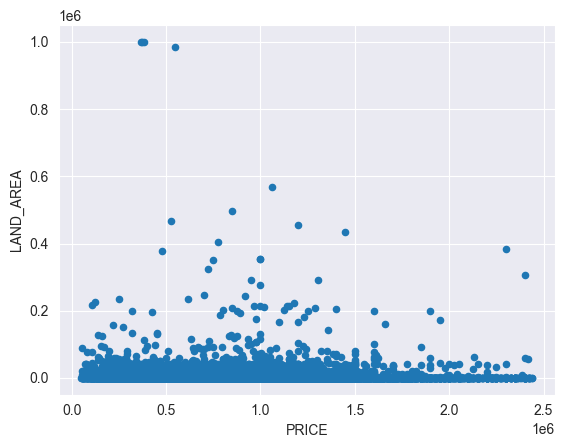

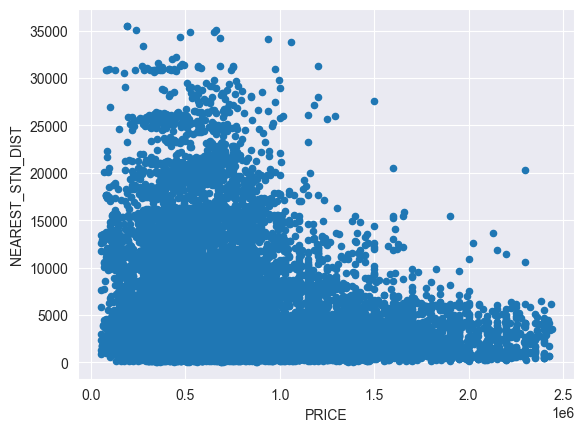

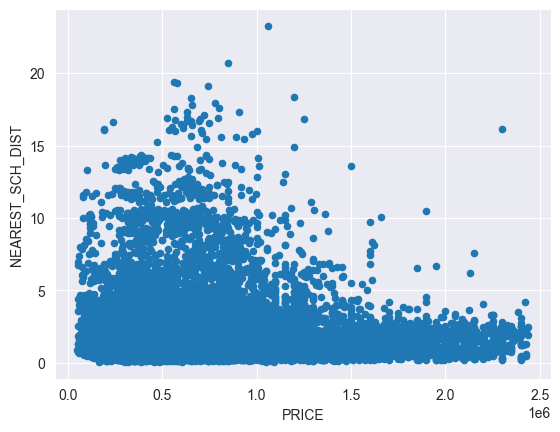

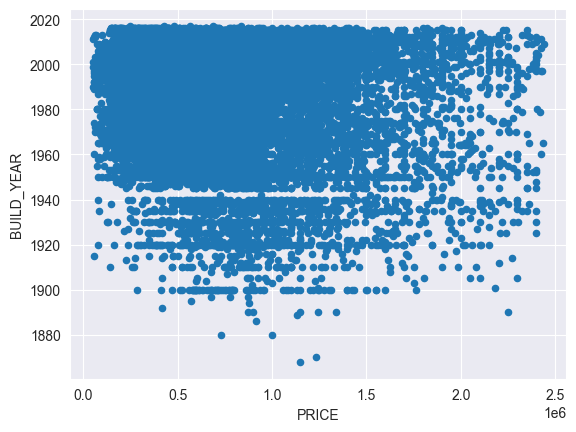

In [4]:
df.plot.scatter(y="CBD_DIST",x="PRICE")
df.plot.scatter(y="FLOOR_AREA",x="PRICE")
df.plot.scatter(y="LAND_AREA",x="PRICE")
df.plot.scatter(y="NEAREST_STN_DIST",x="PRICE")
df.plot.scatter(y="NEAREST_SCH_DIST",x="PRICE")
df.plot.scatter(y="BUILD_YEAR",x="PRICE")

        Ящики с усами

<Axes: title={'center': 'PRICE'}, xlabel='GARAGE'>

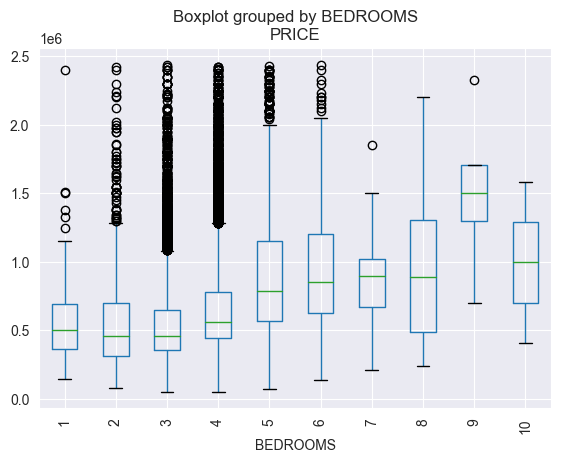

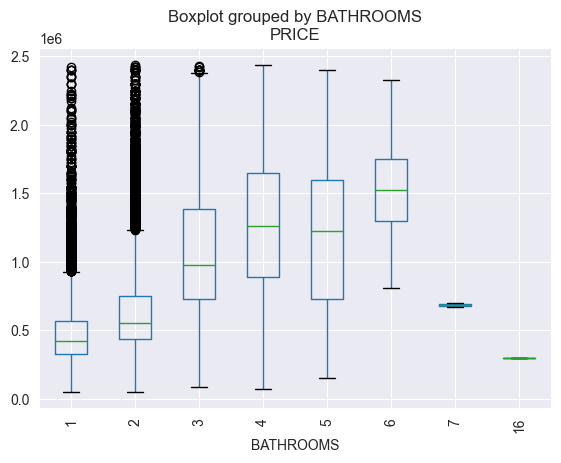

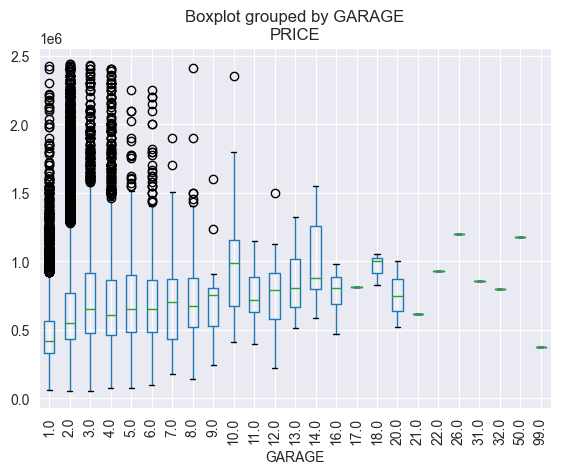

In [5]:
df.boxplot(column=["PRICE"], by="BEDROOMS", rot = 90)
df.boxplot(column=["PRICE"], by="BATHROOMS", rot = 90)
df.boxplot(column=["PRICE"], by="GARAGE", rot = 90)

        Гистограммы

array([[<Axes: title={'center': 'BATHROOMS'}>]], dtype=object)

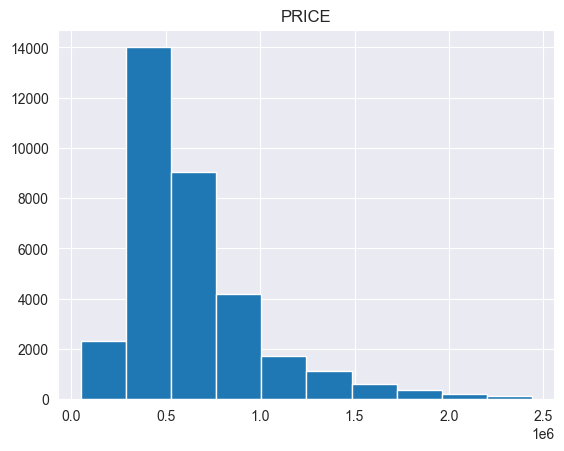

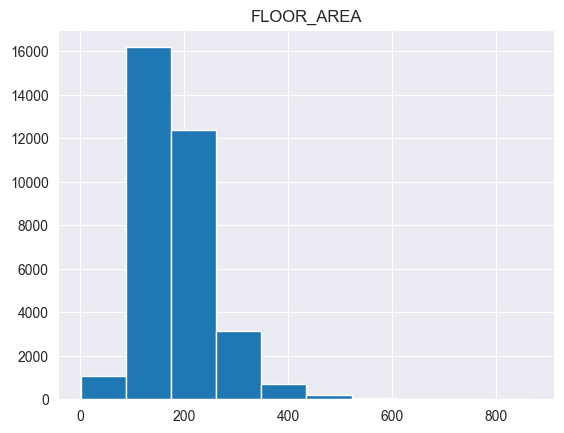

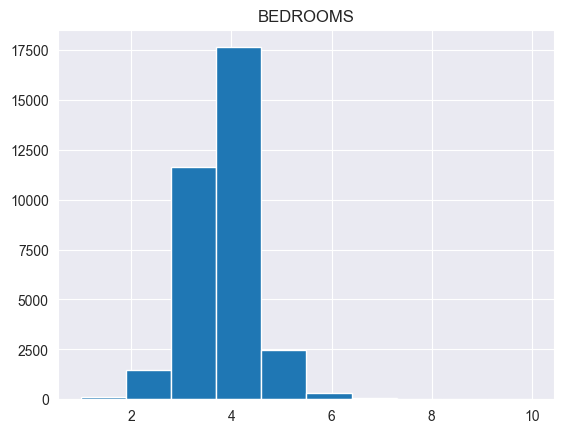

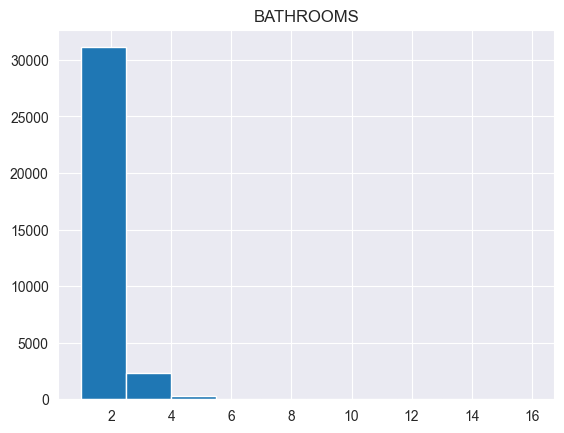

In [6]:
df.hist(column="PRICE")
df.hist(column="FLOOR_AREA")
df.hist(column="BEDROOMS")
df.hist(column="BATHROOMS")

    b. Очистка данных

        Удаление пропусков

Пометка: 
    - в столбце GARAGE значение NULL означает отсутствие гаража
    - в столбце NEAREST_SCH_RANK значение NULL означает, что школа не имеет рейтинга в соответствии с критерием

Замена пустых значений в столбце GARAGE на 0

In [7]:
df['GARAGE'] = df['GARAGE'].fillna(0)

Изменение типа данных в столбце GARAGE на int

In [8]:
df['GARAGE'] = df['GARAGE'].astype(int)

Удаление столбцов, в которых пустах значений больше 25000, и строк, в которых пустых значений больше 18.

In [9]:
df = df.dropna(axis=1, thresh=25000)
df = df.dropna(axis=0, thresh=18)
df = df.drop_duplicates()

Изменение данных: год постройки на int, дату продажи на год продажи и преобразование в int, расстояние до ближайшей школы в метры и перевод в int.

In [10]:
df['BUILD_YEAR'] = df['BUILD_YEAR'].astype(int)
df['DATE_SOLD'] = df['DATE_SOLD'].str[3:]
df['DATE_SOLD'] = df['DATE_SOLD'].astype(int)
df['NEAREST_SCH_DIST'] = df['NEAREST_SCH_DIST'] * 1000
df['NEAREST_SCH_DIST'] = df['NEAREST_SCH_DIST'].astype(int)

In [11]:
row_count = df.shape[0]
column_count = df.shape[1]

In [12]:
print(f'The DataFrame has {row_count} rows.')
print(f'The DataFrame has {column_count} columns.')
df

The DataFrame has 30501 rows.
The DataFrame has 18 columns.


,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST
0,1 Acorn Place,South Lake,565000,4,2,2,600,160,2003,18300,Cockburn Central Station,1800,2018,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,828
1,1 Addis Way,Wandi,365000,3,2,2,351,139,2013,26900,Kwinana Station,4900,2019,6167,-32.193470,115.859554,ATWELL COLLEGE,5524
2,1 Ainsley Court,Camillo,287000,3,1,1,719,86,1979,22600,Challis Station,1900,2015,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1649
3,1 Albert Street,Bellevue,255000,2,1,2,651,59,1953,17900,Midland Station,3600,2018,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1571
4,1 Aman Place,Lockridge,325000,4,1,2,466,131,1998,11200,Bassendean Station,2000,2016,6054,-31.885790,115.947780,KIARA COLLEGE,1514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33648,9B Teocote Crescent,Aubin Grove,423000,3,2,2,248,108,2011,24900,Cockburn Central Station,5700,2016,6164,-32.176013,115.858357,ATWELL COLLEGE,3607
33649,9B Viveash Road,Middle Swan,467000,4,2,2,400,132,2014,17100,Midland Station,2500,2015,6056,-31.872192,116.013543,LA SALLE COLLEGE,1116
33650,9b Wesley Street,South Fremantle,955000,3,2,1,200,127,1997,16000,Fremantle Station,1900,2019,6162,-32.066410,115.756070,FREMANTLE COLLEGE,1134
33651,9C Gold Street,South Fremantle,1040000,4,3,2,292,245,2013,16100,Fremantle Station,1500,2016,6162,-32.064580,115.751820,CHRISTIAN BROTHERS' COLLEGE,1430


Оставляем в датасете только столбцы с числовыми данными, заполняем пропуски нулями

In [13]:
df = df.select_dtypes(include='number')
df = df.fillna(0)
df = df[["PRICE", "BEDROOMS", "BATHROOMS", "GARAGE", "LAND_AREA", "FLOOR_AREA", "BUILD_YEAR", "DATE_SOLD", "CBD_DIST", "NEAREST_STN_DIST", "NEAREST_SCH_DIST"]]
df

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,DATE_SOLD,CBD_DIST,NEAREST_STN_DIST,NEAREST_SCH_DIST
0,565000,4,2,2,600,160,2003,2018,18300,1800,828
1,365000,3,2,2,351,139,2013,2019,26900,4900,5524
2,287000,3,1,1,719,86,1979,2015,22600,1900,1649
3,255000,2,1,2,651,59,1953,2018,17900,3600,1571
4,325000,4,1,2,466,131,1998,2016,11200,2000,1514
...,...,...,...,...,...,...,...,...,...,...,...
33648,423000,3,2,2,248,108,2011,2016,24900,5700,3607
33649,467000,4,2,2,400,132,2014,2015,17100,2500,1116
33650,955000,3,2,1,200,127,1997,2019,16000,1900,1134
33651,1040000,4,3,2,292,245,2013,2016,16100,1500,1430


            Нормализация

In [14]:
df['PRICE'] = (df['PRICE'] - df['PRICE'].median())/df['PRICE'].std()
df['BEDROOMS'] = (df['BEDROOMS'] - df['BEDROOMS'].median())/df['BEDROOMS'].std()
df['BATHROOMS'] = (df['BATHROOMS'] - df['BATHROOMS'].median())/df['BATHROOMS'].std()
df['GARAGE'] = (df['GARAGE'] - df['GARAGE'].median())/df['GARAGE'].std()
df['LAND_AREA'] = (df['LAND_AREA'] - df['LAND_AREA'].median())/df['LAND_AREA'].std()
df['FLOOR_AREA'] = (df['FLOOR_AREA'] - df['FLOOR_AREA'].median())/df['FLOOR_AREA'].std()
df['BUILD_YEAR'] = (df['BUILD_YEAR'] - df['BUILD_YEAR'].median())/df['BUILD_YEAR'].std()
df['DATE_SOLD'] = (df['DATE_SOLD'] - df['DATE_SOLD'].median())/df['DATE_SOLD'].std()
df['CBD_DIST'] = (df['CBD_DIST'] - df['CBD_DIST'].median())/df['CBD_DIST'].std()
df['NEAREST_SCH_DIST'] = (df['NEAREST_SCH_DIST'] - df['NEAREST_SCH_DIST'].median())/df['NEAREST_SCH_DIST'].std()
df['NEAREST_STN_DIST'] = (df['NEAREST_STN_DIST'] - df['NEAREST_STN_DIST'].median())/df['NEAREST_STN_DIST'].std()
df

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,DATE_SOLD,CBD_DIST,NEAREST_STN_DIST,NEAREST_SCH_DIST
0,0.072784,0.000000,0.000000,0.000000,-0.004876,-0.166686,0.381601,0.285683,0.088487,-0.316988,-0.296650
1,-0.487091,-1.333715,0.000000,0.000000,-0.019504,-0.458386,0.858601,0.571366,0.849476,0.384914,2.467373
2,-0.705442,-1.333715,-1.694922,-0.693615,0.002115,-1.194581,-0.763201,-0.571366,0.468981,-0.294346,0.186583
3,-0.795021,-2.667430,-1.694922,0.000000,-0.001880,-1.569623,-2.003403,0.285683,0.053092,0.090568,0.140673
4,-0.599065,0.000000,-1.694922,0.000000,-0.012748,-0.569509,0.143100,-0.285683,-0.539771,-0.271704,0.107124
...,...,...,...,...,...,...,...,...,...,...,...
33648,-0.324727,-1.333715,0.000000,0.000000,-0.025554,-0.888990,0.763201,-0.285683,0.672502,0.566050,1.339044
33649,-0.201555,0.000000,0.000000,0.000000,-0.016625,-0.555619,0.906301,-0.571366,-0.017697,-0.158494,-0.127136
33650,1.164539,-1.333715,0.000000,-0.693615,-0.028374,-0.625071,0.095400,0.571366,-0.115033,-0.294346,-0.116541
33651,1.402485,0.000000,1.694922,0.000000,-0.022970,1.014004,0.858601,-0.285683,-0.106184,-0.384914,0.057682


3. Корреляция данных

        Матрица корреляций

<Axes: >

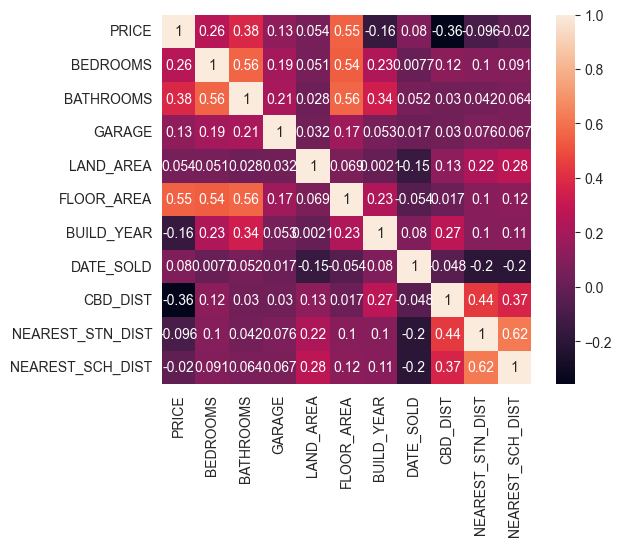

In [15]:
corr = df.corr()
sns.heatmap(corr, annot=True, cbar=True, square=True)